In [7]:
#installation of classiq
!pip install -U classiq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.6/388.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 99.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 110.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 121.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: sympy
    F

In [1]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.7 MB/s eta 0:00:00


In [2]:
import classiq

classiq.authenticate(overwrite=True)

Your user code: LQNW-GGPM
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=LQNW-GGPM


In [30]:
# from classiq import prepare_amplitudes
import numpy as np
from classiq import write_qmod
from classiq.execution import (
    ClassiqBackendPreferences,
    ExecutionPreferences,
    set_quantum_program_execution_preferences,
)
from qiskit.quantum_info import SparsePauliOp
from classiq import (PauliTerm,Pauli)
from classiq import (
    CustomHardwareSettings,
    Preferences,
    QArray,
    QuantumProgram,
    allocate,
    create_model,
    qfunc,
    set_preferences,
    show,
    suzuki_trotter,
    synthesize,
    write_qmod,
    Z,
    PauliTerm,
    Pauli,
    execute,
    Output,
    QBit
)
from classiq import prepare_amplitudes
from classiq.execution import (
    ClassiqBackendPreferences,
    ExecutionPreferences,
    set_quantum_program_execution_preferences,
)

In [31]:
N = 4
n = np.log2(N)
m = 1

# mass matrix
M = np.diag(np.full(N,m))
print("Mass matrix")
print(M)

#initial position vector
x = np.zeros(N)
print("Position matrix")
print(x)

#initial velocity vector
x_dot = np.array([1,-1,0,0])
print("Velocity matrix")
print(x_dot)

#spring constant matrix
K = np.array(([1,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]))
print("Spring constant matrix")
print(K)

Mass matrix
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Position matrix
[0. 0. 0. 0.]
Velocity matrix
[ 1 -1  0  0]
Spring constant matrix
[[1 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]


In [32]:
class Hamiltonian_Formulation:
    def __init__(self, n, K_matrix, M):
        self.N = 2**n
        self.K_matrix = K_matrix
        self.M = M

    def compute_F_matrix(self):
        N = self.N
        K = self.K_matrix
        # Matrix F
        F = np.zeros((N,N))
        for j in range(N):
            for k in range(N):
                if j==k:
                    F[j][k] = sum(K[j])
                else:
                    F[j][k] = -K[j][k]
        self.F_matrix = F

    def compute_B_matrix(self):
        N = self.N
        K = self.K_matrix
        sqM_B = np.zeros((N,int(N*(N+1)/2)))
        count = 0 #this will keep track of the coloumn of B based on |j,k>
        for j in range(N):
            for k in range(N):
                if j==k:
                    sqM_B[j][k] = np.sqrt(K[j][j])
                elif j<k:
                    sqM_B[j][N+count] = np.sqrt(K[j][k])
                    sqM_B[k][N+count] = -np.sqrt(K[j][k])
                    count+=1
        sqM_inv = np.linalg.inv(np.sqrt(M))
        #B matrix
        B = np.matmul(sqM_inv,sqM_B)
        #B dagger matrix
        B_dag = np.matrix(B).getH()
        self.B_matrix = B
        self.B_dag_matrix = B_dag

    def compute_Hamiltonian(self):
        #calling compute_B_matrix
        self.compute_B_matrix()
        ## doing the padding
        B = self.B_matrix
        B_dag = self.B_dag_matrix

        pad_B = np.pad(B,((0,int(N**2-N)),(0,int(N**2-(N*(N+1)/2)))),"constant")
        pad_B_dag = np.matrix(pad_B).getH()
        temp1 = np.concatenate((0*np.identity(N**2),-pad_B),axis = 1)
        temp2 = np.concatenate((-pad_B_dag, 0*np.identity(N**2)),axis = 1)
        # getting the hamiltonian
        H = np.concatenate((temp1,temp2),axis = 0)
        self.H_matrix = H

In [33]:
# Saving qprog files
def save_new_file(program_to_save,file_name):
    '''
    A simple function that saves your code as a text file
    '''
    file = open(file_name,"w")
    file.write(program_to_save)
    file.close()

In [34]:
circuit_depth = []
sim_time = 10
full_pos = []
full_vel = []

for time_T in range(sim_time):
  #y_dot vector
  print(x)
  print(x_dot)
  y_dot = np.matmul(np.transpose(x_dot),np.sqrt(M))
  print("y_dot vector")
  print(y_dot)

  #mu vector
  mu = []
  for i in range(len(K)):
      for j in range(len(K[0])):
          if j>i:
            mu.append(np.sqrt(K[i][j])*(x[i]-x[j]))
          elif j==i:
            mu.append(np.sqrt(K[j][j])*x[j])
  if len(mu)==(N*(N+1)/2):
      print("mu vector is formed correctly")
  print("M = ",M)
  print("x_dot = ",x_dot,"y_dot = ",y_dot, "mu = ", mu)

  #Initial State
  psi0 = []
  E = 1
  psi0 = np.concatenate([y_dot,i*np.array(mu)])/np.sqrt(2*E)
  print("psi0 = ",psi0, "size_of_psi0 = ",len(psi0))

  #making dimesion of q suitable with padding zeros
  dim = int(N+(N*(N+1)/2))
  while not(dim and (not(dim & (dim - 1)))): #checking of it is a power of 2
      dim+=1

  num_qubits = int(np.log2(dim))
  print(num_qubits)

  ham_formulation = Hamiltonian_Formulation(int(n), K, M)
  ham_formulation.compute_Hamiltonian()
  H_matrix = ham_formulation.H_matrix
  H_list = np.array(H_matrix.tolist())
  H_ops = SparsePauliOp.from_operator(H_list)
  H_ops_list = H_ops.to_list()
  H_ops_structured = []
  for i in range(len(H_ops_list)):
      H_ops_structured.append((str(H_ops_list[i][0]),np.real(H_ops_list[i][1])))

  H_ops_restructured = []
  for i in range(len(H_ops_structured)):
    str_value = H_ops_structured[i][0]
    pauli_val = []
    for x in range(len(str_value)):
      if str_value[x] == 'X':
        pauli_val.append(Pauli.X)
      elif str_value[x] == 'Y':
        pauli_val.append(Pauli.Y)
      elif str_value[x] == 'Z':
        pauli_val.append(Pauli.Z)
      elif str_value[x] == 'I':
        pauli_val.append(Pauli.I)
    H_ops_restructured.append(PauliTerm(pauli=pauli_val,coefficient=H_ops_structured[i][1]))

  final_time = 1
  @qfunc
  def main(io: Output[QArray[QBit]]) -> None:
      psi_squared = psi0 #**2 important
      # if time_T != 0:
      psi_squared = psi_squared / np.linalg.norm(psi_squared)
      total_shape = int(len(H_list))
      for i in range(total_shape - len(psi_squared)):
        psi_squared = np.append(psi_squared,0.)
      # state = prepare_state(probabilities=(psi_squared).tolist(), bound=0.01, out=io)
      state = prepare_amplitudes(psi_squared.tolist(),0.0,out=io)
      #Z(io[0]) # As classiq does not support phase (important)
      # allocate(len(H_ops_restructured[0].pauli), io)
      suzuki_trotter(
          H_ops_restructured,
          qbv=io,
          evolution_coefficient=final_time,
          order=2,
          repetitions=1,
      )


  qmod = create_model(main)
  qmod = set_preferences(
      qmod,
      preferences=Preferences(
          custom_hardware_settings=CustomHardwareSettings(basis_gates=["cx", "u"])
      ),
  )
  write_qmod(qmod, "suzuki_trotter_time"+str(time_T))

  qprog = synthesize(qmod)
  save_new_file(qprog, 'suzuki_trotter_time'+str(time_T)+'.qprog') # You need to submit this file
  circuit = QuantumProgram.from_qprog(qprog)

  print(f"Classiq's exponentiation depth is {circuit.transpiled_circuit.depth}")
  print(
      f"Classiq's exponentiation CX-count is {circuit.transpiled_circuit.count_ops['cx']}"
  )
  circuit_depth.append(circuit.transpiled_circuit.depth)
  preferences = ExecutionPreferences(
    backend_preferences=ClassiqBackendPreferences(backend_name="aer_simulator_statevector")
  )
  qprog = set_quantum_program_execution_preferences(qprog, preferences)
  job = execute(qprog)
  results = job.result()
  parsed_counts = results[0].value.parsed_counts
  print(parsed_counts)
  state_vector = results[0].value.state_vector
  print(state_vector)

  obtained_state_vector = []

  for i in range(len(list(state_vector.values()))):
    val = list(state_vector.values())[i]
    val = val.replace("(", "")
    val = val.replace(")", "")
    val = complex(val)
    val = np.real(val)
    obtained_state_vector.append(val)
  print(obtained_state_vector)

  #extracting terms from state vector
  ext_y_dot_t = obtained_state_vector[:N] #momentum term
  ext_mu_t = obtained_state_vector[N:N+int(N*(N+1)/2)]
  print(ext_y_dot_t)
  print(ext_mu_t)
  #with this padding is also removed

  velocity = []
  for i in range(len(ext_y_dot_t)):
      velocity.append(np.sqrt(2*E)*ext_y_dot_t[i]/np.sqrt(M[i][i]))

  position = []
  for i in range(int(N*(N-1)/2),int(N*(N+1)/2)):
      if K[int(i-N*(N-1)/2)][int(i-N*(N-1)/2)] ==0:
          position.append(0)
      else:
          position.append(np.sqrt(2*E)*ext_mu_t[i]/np.sqrt(K[int(i-N*(N-1)/2)][int(i-N*(N-1)/2)]))

  print("Values of Dynamic Variables at time t" + str(time_T))
  print("position vector:",position)
  print("velcoity vector:",velocity)

  full_pos.append(position)
  full_vel.append(velocity)

  x = np.array(position)
  x_dot = np.array(velocity)


print(full_pos)
print(full_vel)

[0. 0. 0. 0.]
[ 1 -1  0  0]
y_dot vector
[ 1. -1.  0.  0.]
mu vector is formed correctly
M =  [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
x_dot =  [ 1 -1  0  0] y_dot =  [ 1. -1.  0.  0.] mu =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
psi0 =  [ 0.70710678 -0.70710678  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] size_of_psi0 =  14
4
Classiq's exponentiation depth is 1042
Classiq's exponentiation CX-count is 752
[{'io': 20.0}: 1359, {'io': 16.0}: 334, {'io': 23.0}: 183, {'io': 2.0}: 110, {'io': 25.0}: 32, {'io': 0.0}: 11, {'io': 21.0}: 10, {'io': 1.0}: 3, {'io': 3.0}: 2, {'io': 17.0}: 1, {'io': 22.0}: 1, {'io': 4.0}: 1, {'io': 11.0}: 1]
{'00000': '(0.003862578786544224+0.08615881915805428j)', '00001': '(0.4138312876381705-0.01855243570488032j)', '00010': '(-8.596114045080015e-05-0.0019174522421752786j)', '00011': '(-0.010272833312005628+0.0004605405275565766j)', '00100': '(0.00131566251942438

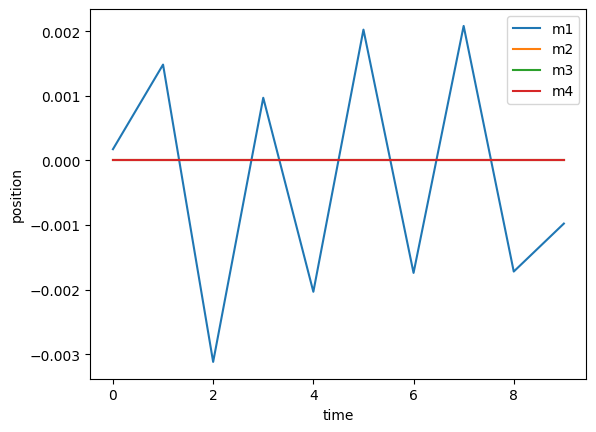

In [35]:
full_pos_m1 = []
full_pos_m2 = []
full_pos_m3 = []
full_pos_m4 = []

for i in range(len(full_pos)):
  full_pos_m1.append(full_pos[i][0])
  full_pos_m2.append(full_pos[i][1])
  full_pos_m3.append(full_pos[i][2])
  full_pos_m4.append(full_pos[i][3])


#plotting position
import matplotlib.pyplot as plt
plt.plot(full_pos_m1)
plt.plot(full_pos_m2)
plt.plot(full_pos_m3)
plt.plot(full_pos_m4)
plt.legend(["m1","m2","m3","m4"])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

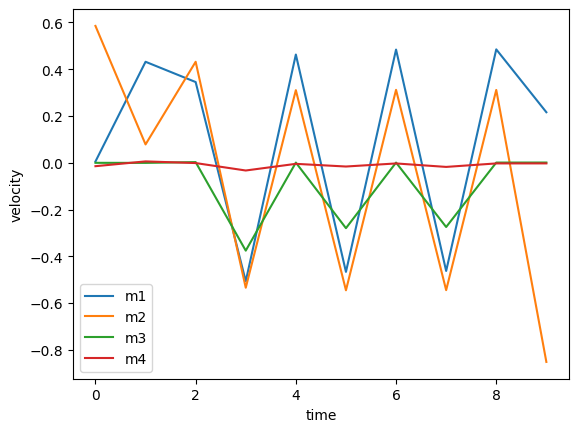

In [36]:
full_vel_m1 = []
full_vel_m2 = []
full_vel_m3 = []
full_vel_m4 = []

for i in range(len(full_vel)):
  full_vel_m1.append(full_vel[i][0])
  full_vel_m2.append(full_vel[i][1])
  full_vel_m3.append(full_vel[i][2])
  full_vel_m4.append(full_vel[i][3])


plt.plot(full_vel_m1)
plt.plot(full_vel_m2)
plt.plot(full_vel_m3)
plt.plot(full_vel_m4)
plt.legend(["m1","m2","m3","m4"])
plt.xlabel("time")
plt.ylabel("velocity")
plt.show()

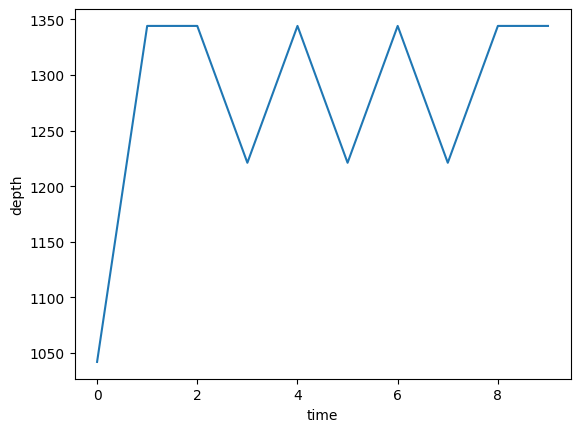

In [37]:
#depth
plt.plot(circuit_depth)
plt.xlabel("time")
plt.ylabel("depth")
plt.show()

In [38]:
!zip -r /content/output.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2024.04.11/ (stored 0%)
  adding: content/.config/logs/2024.04.11/13.20.55.387089.log (deflated 58%)
  adding: content/.config/logs/2024.04.11/13.21.15.072579.log (deflated 58%)
  adding: content/.config/logs/2024.04.11/13.20.28.090352.log (deflated 91%)
  adding: content/.config/logs/2024.04.11/13.21.25.919190.log (deflated 57%)
  adding: content/.config/logs/2024.04.11/13.21.26.545746.log (deflated 56%)
  adding: content/.config/logs/2024.04.11/13.21.06.258241.log (deflated 86%)
  adding: co